Задание 8.11

In [1]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


#Номер 1


In [2]:
M = 103
sample_sizes = [10, 20, 50, 100, 200]

# Генерация выборок
normal_samples = {n: [np.random.normal(0, 1, n) for _ in range(M)] for n in sample_sizes}
uniform_samples = {n: [np.random.uniform(-1, 1, n) for _ in range(M)] for n in sample_sizes}
exponential_samples = {n: [np.random.exponential(1, n) for _ in range(M)] for n in sample_sizes}

#Номер 2


In [3]:
def calculate_outliers(samples):
    results = {}
    for n, sample_list in samples.items():
        results[n] = {
            'z_score_outliers': [],
            'modified_z_score_outliers': [],
            'boxplot_outliers': [],
        }

        k = 1.5  # Константа для boxplot
        for sample in sample_list:
            z_scores = zscore(sample)
            mod_z_scores = 0.6745 * (sample - np.median(sample)) / np.std(sample)

            # Определяем выбросы для z-score (используя критическое значение)
            z_critical = np.percentile(z_scores, 100 * (1 - 0.05/2))
            z_outliers = [i for i, z in enumerate(z_scores) if np.abs(z) > z_critical]
            results[n]['z_score_outliers'].extend(z_outliers)

            # Выбросы по модифицированным z-score
            mod_z_critical = 3.5  # Обратив внимание на выбор модифицированного z-score
            mod_outliers = [i for i, m in enumerate(mod_z_scores) if np.abs(m) > mod_z_critical]
            results[n]['modified_z_score_outliers'].extend(mod_outliers)

            # Выбросы по boxplot
            q1, q3 = np.percentile(sample, [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - k * iqr
            upper_bound = q3 + k * iqr
            boxplot_outliers = [i for i, x in enumerate(sample) if x < lower_bound or x > upper_bound]
            results[n]['boxplot_outliers'].extend(boxplot_outliers)

    return results

outlier_results_normal = calculate_outliers(normal_samples)
outlier_results_uniform = calculate_outliers(uniform_samples)
outlier_results_exponential = calculate_outliers(exponential_samples)

#Номер 3


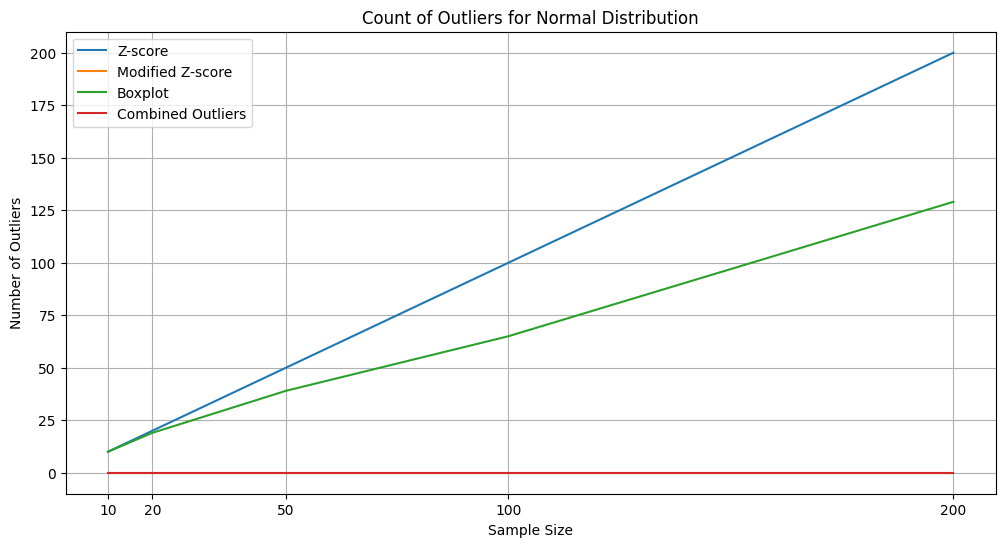

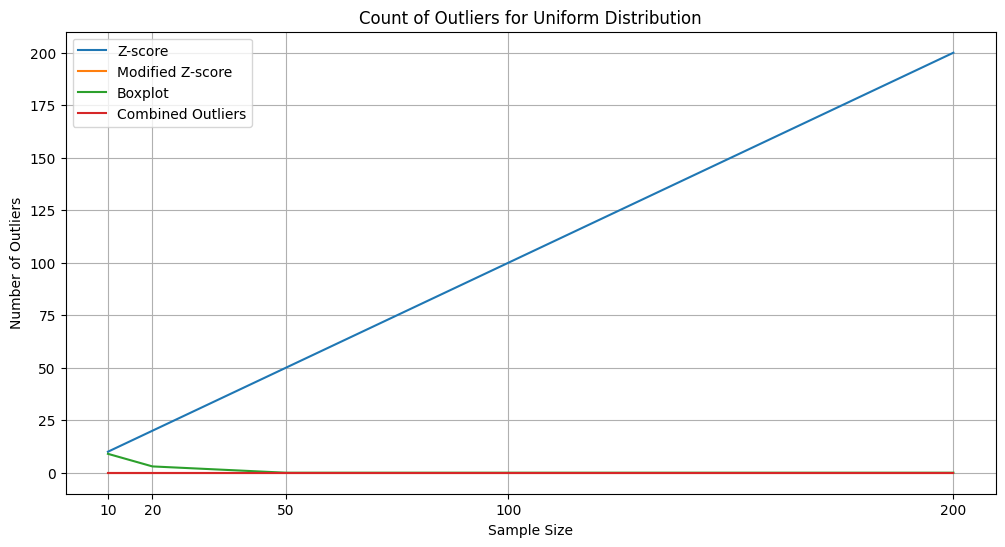

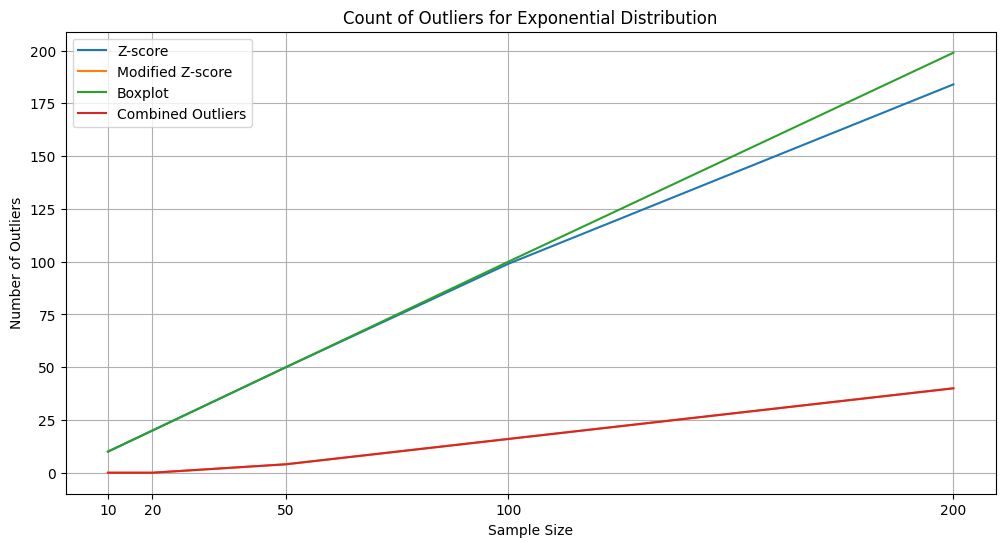

In [4]:
def count_outliers_and_plot(results, dist_name):
    counts_z = []
    counts_mod = []
    counts_box = []
    counts_combined = []

    for n in sample_sizes:
        z_count = len(set(results[n]['z_score_outliers']))
        mod_count = len(set(results[n]['modified_z_score_outliers']))
        box_count = len(set(results[n]['boxplot_outliers']))

        combined_count = len(set(results[n]['z_score_outliers']).intersection(
            set(results[n]['modified_z_score_outliers']),
        ).intersection(set(results[n]['boxplot_outliers'])))

        counts_z.append(z_count)
        counts_mod.append(mod_count)
        counts_box.append(box_count)
        counts_combined.append(combined_count)

    plt.figure(figsize=(12, 6))
    plt.plot(sample_sizes, counts_z, label='Z-score')
    plt.plot(sample_sizes, counts_mod, label='Modified Z-score')
    plt.plot(sample_sizes, counts_box, label='Boxplot')
    plt.plot(sample_sizes, counts_combined, label='Combined Outliers')
    plt.title(f'Count of Outliers for {dist_name} Distribution')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of Outliers')
    plt.xticks(sample_sizes)
    plt.legend()
    plt.grid()
    plt.show()

count_outliers_and_plot(outlier_results_normal, 'Normal')
count_outliers_and_plot(outlier_results_uniform, 'Uniform')
count_outliers_and_plot(outlier_results_exponential, 'Exponential')

#ДЗ


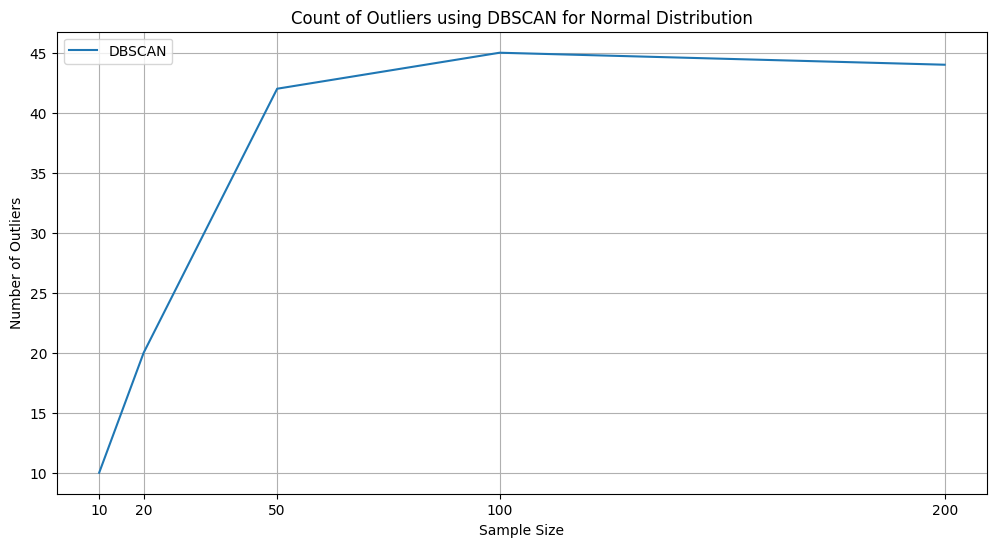

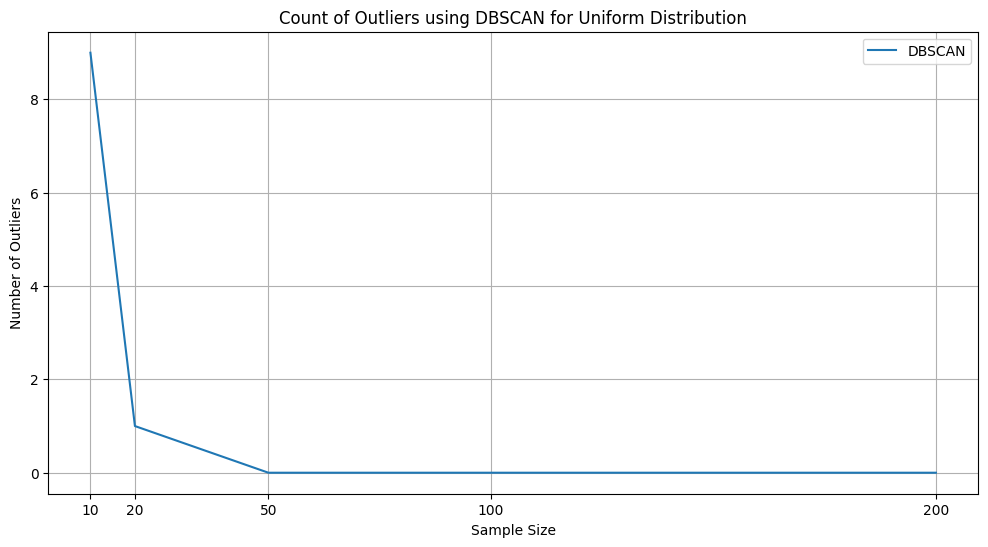

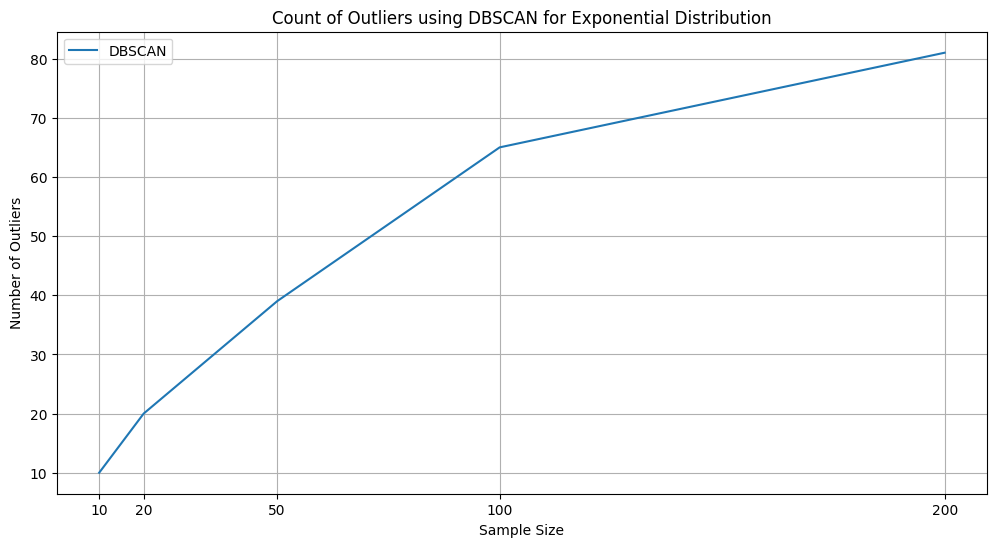

In [5]:
def dbscan_outlier_detection(samples):
    results_dbscan = {}
    for n, sample_list in samples.items():
        results_dbscan[n] = []
        for sample in sample_list:
            db = DBSCAN(eps=0.5, min_samples=2).fit(sample.reshape(-1, 1))
            # Признак выброса = -1 в DBSCAN
            outliers = np.where(db.labels_ == -1)[0]
            results_dbscan[n].extend(outliers)
    return results_dbscan

dbscan_results_normal = dbscan_outlier_detection(normal_samples)
dbscan_results_uniform = dbscan_outlier_detection(uniform_samples)
dbscan_results_exponential = dbscan_outlier_detection(exponential_samples)

# Объединим результаты с DBSCAN для графиков
def count_dbscan_outliers_and_plot(results, dist_name):
    counts_dbscan = []

    for n in sample_sizes:
        dbscan_count = len(set(results[n]))
        counts_dbscan.append(dbscan_count)

    plt.figure(figsize=(12, 6))
    plt.plot(sample_sizes, counts_dbscan, label='DBSCAN')
    plt.title(f'Count of Outliers using DBSCAN for {dist_name} Distribution')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of Outliers')
    plt.xticks(sample_sizes)
    plt.legend()
    plt.grid()
    plt.show()

count_dbscan_outliers_and_plot(dbscan_results_normal, 'Normal')
count_dbscan_outliers_and_plot(dbscan_results_uniform, 'Uniform')
count_dbscan_outliers_and_plot(dbscan_results_exponential, 'Exponential')